In [1]:
import pandas as pd

australia = pd.read_csv("./weatherAUS.csv")

In [2]:
australia.head(10)
australia = australia.drop(['Date'],axis=1)
australia = australia.drop(['RISK_MM'],axis = 1)

In [3]:
australia = australia.dropna()

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(australia['WindGustDir'].unique())
australia['WindGustDir'] = le.transform(australia['WindGustDir']) 


In [5]:
le = preprocessing.LabelEncoder()
le.fit(australia['WindDir9am'].unique())
australia['WindDir9am'] = le.transform(australia['WindDir9am']) 

In [6]:
le = preprocessing.LabelEncoder()
le.fit(australia['Location'].unique())
australia['Location'] = le.transform(australia['Location'])

In [7]:
le = preprocessing.LabelEncoder()
le.fit(australia['WindDir3pm'].unique())
australia['WindDir3pm'] = le.transform(australia['WindDir3pm'])

In [9]:
australia.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,12.628837,13.464770,24.219206,2.130397,5.503135,7.735626,7.485537,40.877366,7.122935,7.574424,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333
std,7.301231,6.416689,6.970676,7.014822,3.696282,3.758153,4.792305,13.335232,4.660823,4.711700,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543
min,0.000000,-6.700000,4.100000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000
25%,7.000000,8.600000,18.700000,0.000000,2.800000,5.000000,3.000000,31.000000,3.000000,3.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000
50%,13.000000,13.200000,23.900000,0.000000,5.000000,8.600000,8.000000,39.000000,7.000000,8.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000
75%,19.000000,18.400000,29.700000,0.600000,7.400000,10.700000,12.000000,48.000000,11.000000,12.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000
max,25.000000,31.400000,48.100000,206.200000,81.200000,14.500000,15.000000,124.000000,15.000000,15.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000


In [11]:
australia.dtypes

Location           int64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed    float64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [12]:
X = australia.drop(['RainTomorrow'],axis= 1)
y = australia['RainTomorrow']

In [13]:
y = y.replace('Yes', 1).replace('No', 0)

X = X.replace('Yes',1).replace('No',0)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron


def test_model(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)
    model.fit(X_train, y_train)
    print(f"{type(model).__name__} -> {model.score(X_test, y_test)}")


def test_classification(X, y):
    classifiers = [
        SGDClassifier(max_iter=100),
        Perceptron(random_state=5),
    ]
    for classifier in classifiers:
        test_model(classifier, X, y)

In [15]:
test_classification(X , y)

SGDClassifier -> 0.7765186100220205
Perceptron -> 0.8459638004189269


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)

In [18]:
from sklearn import tree
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron = perceptron.fit(X_train, y_train)
perceptron.score(X_test, y_test)

0.8434932058649767

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, perceptron.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     14552
           1       0.64      0.63      0.64      4067

    accuracy                           0.84     18619
   macro avg       0.77      0.77      0.77     18619
weighted avg       0.84      0.84      0.84     18619



In [20]:
y_pred = perceptron.predict(X_test)

y_pred


array([0, 1, 1, ..., 0, 1, 0])

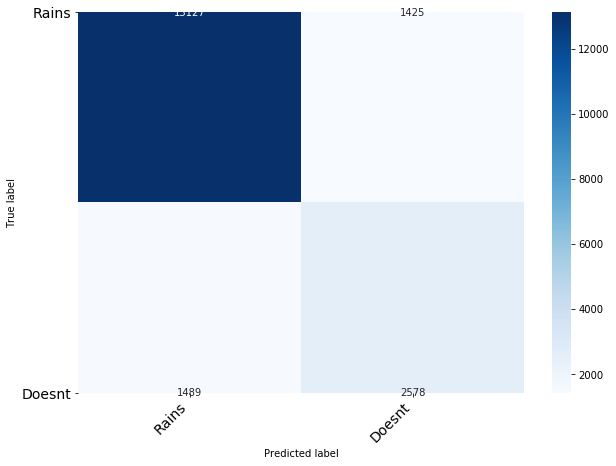

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap="Blues")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, perceptron.predict(X_test))

print_confusion_matrix(conf, ['Rains', 'Doesnt'])

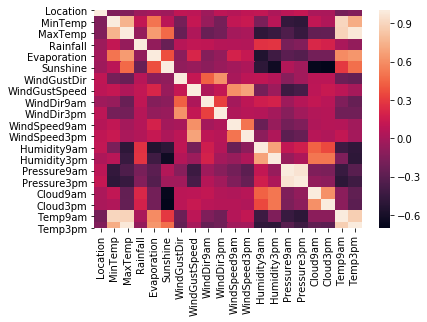

In [22]:
import seaborn as sns
corr = australia.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)